In [145]:
%matplotlib inline
import random
from pathlib import Path 

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits import axisartist
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
# make this a two axis - broken apart and combined
slide_path = Path('../../../slides/figures/math/')
proposal_path = Path('../../../draft/figures/math/')

In [107]:
df = pd.read_csv("../../intro/nydata")

In [108]:
df.head()

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,TAVG
0,ALBANY 0.3 ESE,42.6641,-73.7935,2021-03-31,0.0,NaN
1,ALBANY 0.3 ESE,42.6641,-73.7935,2021-04-01,64.0,NaN
2,ALBANY 0.3 ESE,42.6641,-73.7935,2021-04-02,97.0,NaN
3,ALBANY 0.3 ESE,42.6641,-73.7935,2021-04-03,0.0,NaN
4,ALBANY 0.3 ESE,42.6641,-73.7935,2021-04-04,0.0,NaN


In [109]:
df['DATE2'] = pd.to_datetime(df['DATE'])

In [110]:
jfk = df[df['NAME'].str.contains("NEW YORK JFK INTL AP")]
lga = df[df['NAME'].str.contains("NEW YORK LAGUARDIA AP")]

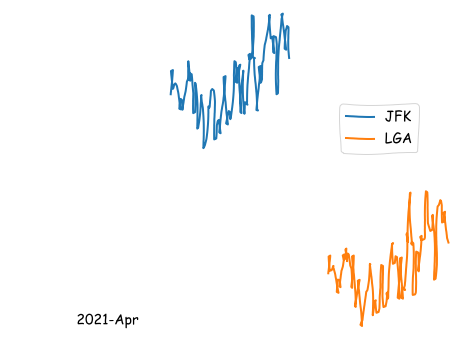

In [111]:
with plt.xkcd():
    fig = plt.figure(figsize=(8,6))


    axy = axisartist.Subplot(fig, 2, 3, 1)
    fig.add_subplot(axy)
    axy.axis[:].set_visible(False)
    axy.axis["y"] = axy.new_floating_axis(1, 0)
    axy.axis["y"].set_axisline_style("->", size=1.5)
    axy.axis["y"].set_axis_direction("left")
    axy.tick_params(direction='in')
    axy.plot(lga['DATE2'], lga['TAVG'], color='white')

    axx = axisartist.Subplot(fig, 2, 3, 4)
    fig.add_subplot(axx)
    axx.axis[:].set_visible(False)
    axx.axis["x"] = axx.new_floating_axis(0, 0.5)
    #axx.axis["x"].set_axisline_style("->", size=1.5)
    axx.tick_params(direction='out')
    axx.plot(lga['DATE2'], lga['TAVG'], color='white')
    #axy.set_xlim(lga['DATE2'].iloc[0], lga['DATE2'].iloc[-1])
    axx.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator))

    axd = fig.add_subplot(2,3,2)
    axd.plot(jfk['DATE2'], jfk['TAVG'], color='tab:blue', label="JFK")
    axd.axis('off')

    axd2 = fig.add_subplot(2,3,6)
    axd2.plot(lga['DATE2'], lga['TAVG'], color='tab:orange', label="LGA")
    axd2.axis('off')

    fig.legend(bbox_to_anchor=(.85,.67))
    fig.savefig(slide_path/"exploding_artist.png")
    fig.savefig(proposal_path/"exploding_artist.png")

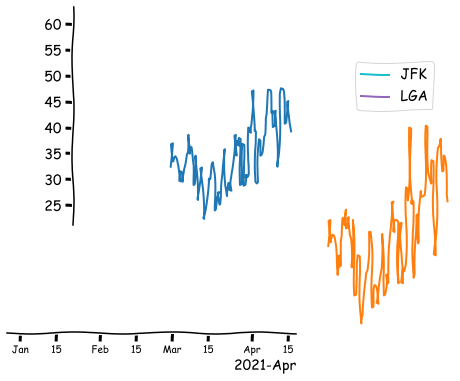

In [123]:
with plt.xkcd():
    fig, axd = plt.subplot_mosaic([['y', 'jfk', 'legend',], ['x','x', 'lga']], figsize=(8,6))

    for name in ['x', 'y']:
        axd[name].plot(lga['DATE2'], lga['TAVG'], color='white', zorder=-1)

    axd['y'].spines[['top', 'right','bottom']].set_visible(False)
    axd['y'].spines['left'].set_position('center')
    axd['y'].tick_params('x', length=0)
    axd['y'].set(xticklabels=[])
    pos = axd['y'].get_position()
    axd['x'].spines[['top', 'left','right']].set_visible(False)
    axd['x'].tick_params('y', length=0)
    axd['x'].tick_params('x', labelsize=10)
    axd['x'].set(yticklabels=[])
    axd['x'].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

    axd['jfk'].plot(jfk['DATE2'], jfk['TAVG'], color='tab:blue', label="JFK")
    axd['jfk'].set_ylim(20,80)
    axd['jfk'].axis('off')
    

    axd['lga'].plot(lga['DATE2'], lga['TAVG'], color='tab:orange', label="LGA")
    axd['lga'].axis('off')

    r1 = mlines.Line2D([0,1],[0,1], color='tab:cyan')
    r2 = mlines.Line2D([0,1], [0,1], color='tab:purple')
    axd['legend'].legend([r1, r2], ['JFK', 'LGA'], bbox_to_anchor=(.9,.78), bbox_transform=axd['legend'].transAxes)
    axd['legend'].axis('off')
    fig.subplots_adjust(hspace=-.5)
fig.savefig(slide_path/"exploding_artist.png")
fig.savefig(proposal_path/"exploding_artist.png", bbox_inches='tight')

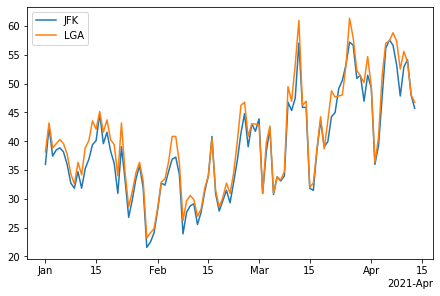

In [14]:
fig, axd = plt.subplot_mosaic([['all']], constrained_layout=True)
   

axd['all'].plot(jfk['DATE2'], jfk['TAVG'], color='tab:blue', label="JFK")
axd['all'].plot(lga['DATE2'], lga['TAVG'], color='tab:orange', label="LGA")
axd['all'].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator))
axd['all'].legend()
fig.savefig(proposal_path/"combined_artist.png")

In [161]:
colors = ['tab:orange', 'tab:blue', 'tab:green', 'tab:purple']
markers = ['x', r'$\infty$', r'$\circ$' ]
pars = [(c,m) for c in colors for m in markers]
random.shuffle(pars)

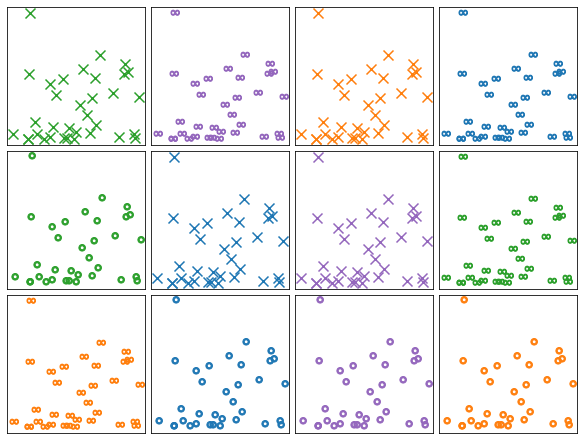

In [168]:

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8,6), constrained_layout=True)
for ax, (c, ms) in zip(axes.flat, pars):
    ax.scatter(jfk['TAVG'][jfk['PRCP']>0], jfk['PRCP'][jfk['PRCP']>0], color=c, marker=ms, s=100)
    ax.set(xticklabels=[], yticklabels=[])
    ax.tick_params(length=0)
fig.savefig(proposal_path/"equivalent_artists.png")

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,DATE2
25763,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-01-01,160.0,35.96,2021-01-01
25764,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-01-02,18.0,42.44,2021-01-02
25765,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-01-03,30.0,37.40,2021-01-03
25766,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-01-04,3.0,38.48,2021-01-04
25767,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-01-05,0.0,38.84,2021-01-05
...,...,...,...,...,...,...,...
25861,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-04-09,0.0,47.84,2021-04-09
25862,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-04-10,15.0,52.88,2021-04-10
25863,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-04-11,112.0,54.14,2021-04-11
25864,NEW YORK JFK INTL AP,40.6386,-73.7622,2021-04-12,124.0,48.02,2021-04-12
